In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
prob = "PandaReacher"
window_size = 10


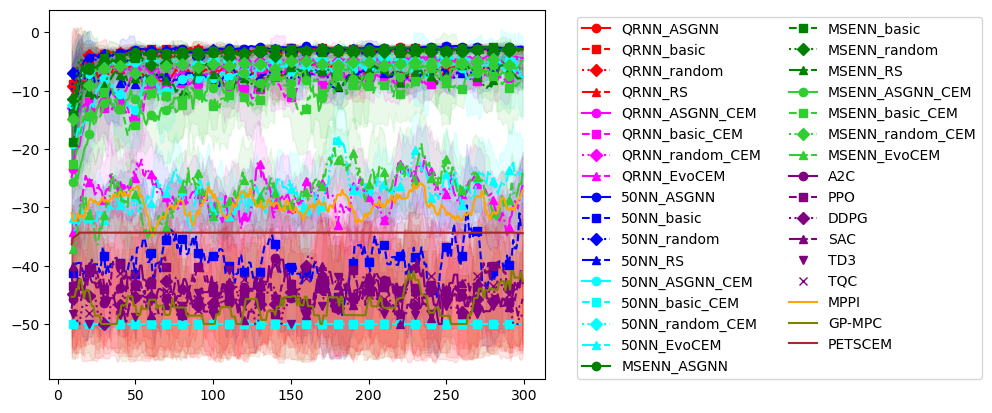

In [13]:
QRNN = {'QRNN_ASGNN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'QRNN_basic': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'QRNN_random': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'QRNN_RS': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_RS_mid_QRNN_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

QRNN_CEM = {'QRNN_ASGNN_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_ASGNN_mid_May12_CEM.npz',
                        # 'C:\Users\nicle\Desktop\QRNN-MPC\PandaReacher_MPC_QRNN_ASGNN_mid_May12_CEM.npz'
    'QRNN_basic_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_basic_mid_May12_CEM.npz',
    'QRNN_random_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_random_mid_May12_CEM.npz',
    'QRNN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_EvoCEM_mid_May12.npz",}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ####################################################
FiftyNN = {'50NN_ASGNN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    '50NN_basic': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    '50NN_random': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    '50NN_RS': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_RS_mid_50NN_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

FiftyNN_CEM = {'50NN_ASGNN_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_ASGNN_mid_May12_CEM.npz',
    '50NN_basic_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_basic_mid_May12_CEM.npz',
    '50NN_random_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_random_mid_May12_CEM.npz',
    '50NN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_EvoCEM_mid_May12.npz",}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# ####################################################
MSENN = {'MSENN_ASGNN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'MSENN_basic': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'MSENN_random': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz',
    'MSENN_RS': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_RS_mid_MSENN_April2_1000_StepsPerEpisodeContLLepisodes_results.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

MSENN_CEM = {'MSENN_ASGNN_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_ASGNN_mid_May12_CEM.npz',
    'MSENN_basic_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_basic_mid_May12_CEM.npz',
    'MSENN_random_CEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_random_mid_May12_CEM.npz',
    'MSENN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_MSENN_EvoCEM_mid_May12.npz"}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # ####################################################
# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:300]
#     std_rewards = data['std_rewards'][:300]

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     plt.plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     plt.fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color='red', alpha=0.1)
#     it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DDPG_results.npz',
    'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_SAC_results.npz',
    'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TD3_results.npz',
    'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:300]
    std_rewards = data['std_rewards'][:300]

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color='red', alpha=0.1)
    it += 1

########################
prob_Control = "PandaReach"
Control_methods = {'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_Control}_MPPI_results.npz',
    'GPMPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_Control}_GP-MPC_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\PETS\\{prob}_PETS_results.npz', # CEM_
    # C:\Users\nicle\Desktop\QRNN-MPC\PETS\PandaReacherDense_PETS_results.npz

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards'][:300]
std_returns_MPPI = MPPI_data['std_rewards'][:300]
# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

GPMPC_data = np.load(Control_methods['GPMPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards'][:300]
std_returns_GPMPC = GPMPC_data['std_rewards'][:300]
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

# iLQR_data = np.load(Control_methods['iLQR'])
# mean_returns_iLQR = iLQR_data['mean_rewards'][:300]
# std_returns_iLQR = iLQR_data['std_rewards'][:300]
# # Smooth the data
# smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
# smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

PETSCEM_data = np.load(Control_methods['PETSCEM'])
mean_returns_PETSCEM = PETSCEM_data['mean_rewards'][:300]
std_returns_PETSCEM = PETSCEM_data['std_rewards'][:300]
# Smooth the data
smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

plt.plot(smoothed_mean_MPPI, label='MPPI', color='orange')
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color='purple', alpha=0.1)
plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
plt.fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)
# plt.plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
# plt.fill_between(range(len(smoothed_mean_iLQR)), 
#                  smoothed_mean_iLQR - smoothed_std_iLQR, 
#                  smoothed_mean_iLQR + smoothed_std_iLQR, 
#                  color=color_iLQR, alpha=0.1)
plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
                 smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
                 smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
                 color=color_PETSCEM, alpha=0.1)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


In [14]:
smoothed_mean_PETSCEM

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
295   -34.366667
296   -34.400000
297   -34.400000
298   -34.400000
299   -34.400000
Length: 300, dtype: float64